<a href="https://colab.research.google.com/github/keeptrain/Culinarix/blob/machine-learning/notebook/collaborative_filtering_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collaborative Filtering Recommender System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate, Dropout
from keras.models import Model, Sequential


## Upload Your Data Here

In [2]:
from google.colab import files
uploaded = files.upload()

Saving culinary_rating.csv to culinary_rating (1).csv


## Explor Your Data



In [3]:
rating = pd.read_csv('culinary_rating.csv')

In [4]:
rating.head()

,User_Id,Place_Id,Culinary_Ratings
0,1,5,5
1,1,15,3
2,1,20,4
3,1,21,2
4,1,41,5


In [26]:
rating.shape

(5692, 3)

In [27]:
rating.describe()

,User_Id,Place_Id,Culinary_Ratings
count,5692.000000,5692.000000,5692.000000
mean,101.868939,187.413739,3.087140
std,57.504115,107.729523,1.360821
min,1.000000,1.000000,1.000000
25%,52.000000,93.000000,2.000000
50%,103.000000,188.000000,3.000000
75%,152.000000,281.000000,4.000000
max,200.000000,371.000000,5.000000


In [6]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5692 entries, 0 to 5691
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   User_Id           5692 non-null   int64
 1   Place_Id          5692 non-null   int64
 2   Culinary_Ratings  5692 non-null   int64
dtypes: int64(3)
memory usage: 133.5 KB


## Modelling

In [78]:
#Split into 90% train data & 10% test data

from sklearn.model_selection import train_test_split
train, test = train_test_split(rating, test_size=0.1, random_state=42)

In [33]:
n_users = len(rating.User_Id.unique())
n_users

200

In [32]:
n_places = len(rating.Place_Id.unique())
n_places

371

We choose Neural Networks for our model because they have proven to be effective in addressing nearly every machine learning problem to date. Furthermore, they excel, especially when applied to recommendation systems.

In [79]:
# Place Embedding Path
place_input = Input(shape=[1], name="Place-Input")
place_embedding = Embedding(n_places+1, 5, name="Place-Embedding")(place_input)
place_vec = Flatten(name="Flatten-Place")(place_embedding)

# User Embedding Path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# Concatenate
conc = Concatenate()([place_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(256, activation='relu')(conc)
fc1_drop = Dropout(0.5)(fc1)  # Tambahkan Dropout
fc2 = Dense(128, activation='relu')(fc1_drop)
fc3 = Dense(128, activation='relu')(fc2)
fc4 = Dense(64, activation='relu')(fc3)
out = Dense(1)(fc4)

# Create Model
model = Model([user_input, place_input], out)

In [80]:
# Compile Model
model.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0004),
              )

In [81]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Place-Input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 User-Input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 Place-Embedding (Embedding  (None, 1, 5)                 1860      ['Place-Input[0][0]']         
 )                                                                                                
                                                                                                  
 User-Embedding (Embedding)  (None, 1, 5)                 1005      ['User-Input[0][0]']    

In [82]:
# Train Model
history = model.fit([train.User_Id, train.Place_Id], train.Culinary_Ratings, epochs=500, verbose=1)

Epoch 1/500
161/161 [==============================] - 2s 3ms/step - loss: 3.4860
Epoch 2/500
161/161 [==============================] - 1s 4ms/step - loss: 1.9004
Epoch 3/500
161/161 [==============================] - 1s 4ms/step - loss: 1.8670
Epoch 4/500
161/161 [==============================] - 1s 4ms/step - loss: 1.8203
Epoch 5/500
161/161 [==============================] - 1s 4ms/step - loss: 1.8116
Epoch 6/500
161/161 [==============================] - 1s 4ms/step - loss: 1.7541
Epoch 7/500
161/161 [==============================] - 1s 5ms/step - loss: 1.7440
Epoch 8/500
161/161 [==============================] - 1s 4ms/step - loss: 1.7197
Epoch 9/500
161/161 [==============================] - 1s 4ms/step - loss: 1.6830
Epoch 10/500
161/161 [==============================] - 1s 4ms/step - loss: 1.6553
Epoch 11/500
161/161 [==============================] - 1s 5ms/step - loss: 1.6296
Epoch 12/500
161/161 [==============================] - 1s 6ms/step - loss: 1.5959
Epoch 13/500


Text(0, 0.5, 'Training Error')

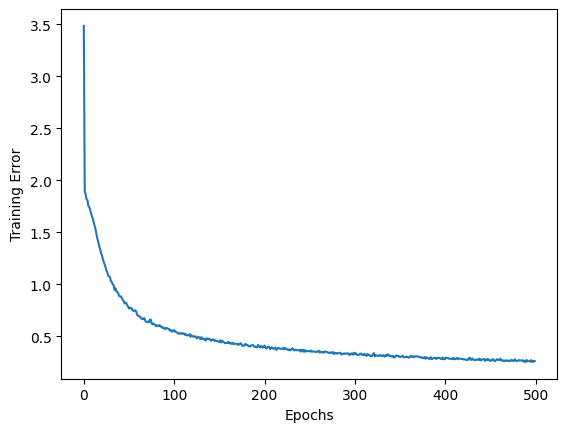

In [83]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [84]:
# Test Model
model.evaluate([test.User_Id, test.Place_Id], test.Culinary_Ratings)

18/18 [==============================] - 0s 2ms/step - loss: 3.4317


3.431715726852417

## Save Model

In [85]:
model.save('recommendation_rating_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Implement Model

In [53]:
id_place = range(1,20)

In [54]:
# Creating dataset for making recommendations for the first user
place_data = np.array(list(set(rating.Place_Id)))
place_data[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Let's try make recommendation for user 5

In [93]:
id_user = 5
user = np.array([id_user for i in range(len(place_data))])
user[:10]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

### Make Prediction

In [94]:
predictions = model.predict([user, place_data])

predictions = np.array([a[0] for a in predictions])

recommended_place_ids = (-predictions).argsort()[:10]

recommended_place_ids

12/12 [==============================] - 0s 6ms/step


array([ 22, 117, 245, 150,  49, 309, 255,  30, 216,  32])

Prediction for user 5 is place with id 22, 117, 245, 150, 49, 309, 255, 30, 216, 32

In [95]:
# print predicted scores
predictions[recommended_place_ids]

array([5.089592 , 5.0538254, 5.0535636, 5.0400677, 4.9769835, 4.974483 ,
       4.927173 , 4.882261 , 4.8641057, 4.8436456], dtype=float32)